Saving loan_approval_dataset.csv to loan_approval_dataset (4).csv
Cleaned column names: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']

Missing values per column:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Encoded dataset sample:
    loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          0              0       9600000   
1        2                 0          1              1       4100000   
2   

/tmp/ipython-input-3256925585.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3256925585.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

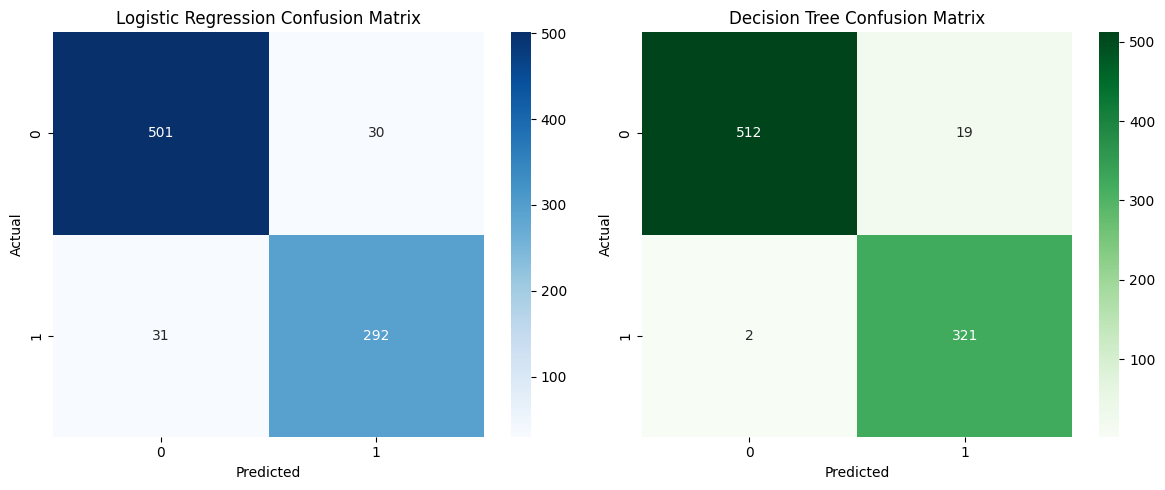

In [6]:
# =============================
# Task 4: Loan Approval Prediction
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from google.colab import files

# =============================
# Upload Dataset
# =============================
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(filename)

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

print("Cleaned column names:", df.columns.tolist())

# =============================
# Basic Cleaning
# =============================

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Fill missing numeric values with median, categorical with mode
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# =============================
# Encode categorical columns
# =============================
label_enc = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = label_enc.fit_transform(df[col])

print("\nEncoded dataset sample:\n", df.head())

# =============================
# Define Features & Target
# =============================
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# =============================
# Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =============================
# Handle Imbalanced Data (SMOTE)
# =============================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:\n", y_train_res.value_counts())

# =============================
# Feature Scaling
# =============================
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# =============================
# Logistic Regression
# =============================
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_res, y_train_res)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_log))

# =============================
# Decision Tree
# =============================
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train_res, y_train_res)
y_pred_tree = tree_model.predict(X_test)

print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_tree))

# =============================
# Confusion Matrix Visualization
# =============================
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
